# CHOCOLATE BAR RATINGS

O chocolate é um derivado do grão de cacau que tem sua origem entre os povos da América do Sul, os Maias e os Astecas. O fruto do cacaueiro, *Thereobrama cacao*, era utilizado para produzir uma bebida chamada “*chocolatl*”, que significa “líquido quente”, na língua Maia. No século XVII, o fruto foi levado para a Europa, onde ocorreu a sua disseminação e, em meados do século XIX, na Holanda, foram desenvolvidas as primeiras barras sólidas de chocolate (TALBOT,2009).

**Esse notebook tem como objetivos apresentar as seguintes análises:**

1. Quais países de origem do grão resultam na classificação mais alta?

2. A porcentagem ou ingredientes de cacau afetam a classificação?

3. Com classificações altas, quais são as características mais memoráveis?

4. Quais são os fabricantes com barras de chocolate altamente avaliadas ?

O dataset [Chocolate Bar Ratings](https://www.kaggle.com/datasets/evangower/chocolate-bar-ratings) está disponível no Kaggle e possui as seguintes características:

Sistema de classificação de sabor: <br>
4.0 - 5.0 = Outstanding <br>
3.5 - 3.9 = Highly Recommended <br>
3.0 - 3.49 = Recommended <br>
2.0 - 2.9 = Disappointing <br>
1.0 - 1.9 = Unpleasant <br>

Legenda da coluna *ingredients*: <br>
B (Beans) <br>
S (Sugar) <br>
S* (Sweetener other than sugar or beet sugar) <br>
C (Cocoa Butter) <br>
(V) Vanilla <br>
(L) Lecithin <br>
Sa (Salt)

## Biblioteca

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

## Análise Exploratória

In [2]:
df = pd.read_csv("chocolate_bars.csv")
df.head()

,id,manufacturer,company_location,year_reviewed,bean_origin,bar_name,cocoa_percent,num_ingredients,ingredients,review,rating
0,2454,5150,U.S.A.,2019,Tanzania,"Kokoa Kamili, batch 1",76.0,3.0,"B,S,C","rich cocoa, fatty, bready",3.25
1,2458,5150,U.S.A.,2019,Dominican Republic,"Zorzal, batch 1",76.0,3.0,"B,S,C","cocoa, vegetal, savory",3.50
2,2454,5150,U.S.A.,2019,Madagascar,"Bejofo Estate, batch 1",76.0,3.0,"B,S,C","cocoa, blackberry, full body",3.75
3,2542,5150,U.S.A.,2021,Fiji,"Matasawalevu, batch 1",68.0,3.0,"B,S,C","chewy, off, rubbery",3.00
4,2546,5150,U.S.A.,2021,Venezuela,"Sur del Lago, batch 1",72.0,3.0,"B,S,C","fatty, earthy, moss, nutty,chalky",3.00


In [3]:
df.tail()

,id,manufacturer,company_location,year_reviewed,bean_origin,bar_name,cocoa_percent,num_ingredients,ingredients,review,rating
2525,1205,Zotter,Austria,2014,Blend,Raw,80.0,4.0,"B,S*,C,Sa","waxy, cloying, vegetal",2.75
2526,1996,Zotter,Austria,2017,Colombia,"APROCAFA, Acandi",75.0,3.0,"B,S,C","strong nutty, marshmallow",3.75
2527,2036,Zotter,Austria,2018,Blend,"Dry Aged, 30 yr Anniversary bar",75.0,3.0,"B,S,C","fatty, earthy, cocoa",3.00
2528,2170,Zotter,Austria,2018,Congo,Mountains of the Moon,70.0,3.0,"B,S,C","fatty, mild nuts, mild fruit",3.25
2529,2170,Zotter,Austria,2018,Belize,Maya Mtn,72.0,3.0,"B,S,C","muted, roasty, accessible",3.50


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2530 entries, 0 to 2529
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                2530 non-null   int64  
 1   manufacturer      2530 non-null   object 
 2   company_location  2530 non-null   object 
 3   year_reviewed     2530 non-null   int64  
 4   bean_origin       2530 non-null   object 
 5   bar_name          2530 non-null   object 
 6   cocoa_percent     2530 non-null   float64
 7   num_ingredients   2443 non-null   float64
 8   ingredients       2443 non-null   object 
 9   review            2530 non-null   object 
 10  rating            2530 non-null   float64
dtypes: float64(3), int64(2), object(6)
memory usage: 217.5+ KB


In [5]:
df.describe()

,id,year_reviewed,cocoa_percent,num_ingredients,rating
count,2530.000000,2530.000000,2530.000000,2443.000000,2530.000000
mean,1429.800791,2014.374308,71.639723,3.041343,3.196344
std,757.648556,3.968267,5.616724,0.913728,0.445321
min,5.000000,2006.000000,42.000000,1.000000,1.000000
25%,802.000000,2012.000000,70.000000,2.000000,3.000000
50%,1454.000000,2015.000000,70.000000,3.000000,3.250000
75%,2079.000000,2018.000000,74.000000,4.000000,3.500000
max,2712.000000,2021.000000,100.000000,6.000000,4.000000


## Processamento dos Dados

In [6]:
# Drop colunas desnecessárias para essa análise
df.drop(['id', 'bar_name'], axis=1, inplace=True)

In [7]:
# Contando total de valores faltantes
df.isna().sum()

manufacturer         0
company_location     0
year_reviewed        0
bean_origin          0
cocoa_percent        0
num_ingredients     87
ingredients         87
review               0
rating               0
dtype: int64

In [8]:
df["num_ingredients"].unique()

array([ 3.,  4.,  2.,  5.,  6., nan,  1.])

In [9]:
df["num_ingredients"].value_counts()

3.0    1023
2.0     750
4.0     469
5.0     191
1.0       6
6.0       4
Name: num_ingredients, dtype: int64

Na coluna *num_ingredients* há linhas que contém apenas 1 ingrediente, logo a porcentagem de cacau na coluna *cocoa_percent* deve ser 100%. É importante, então, verificar a suspeita e qual o ingrediente que está presente, pois assim é possível fazer o preenchimento adequado.

In [10]:
df[df["num_ingredients"] == 1]

,manufacturer,company_location,year_reviewed,bean_origin,cocoa_percent,num_ingredients,ingredients,review,rating
435,C-Amaro,Italy,2013,Ecuador,100.0,1.0,B,"fatty, controlled bitter, fruit",3.50
1197,Hotel Chocolat (Coppeneur),U.K.,2013,Ecuador,100.0,1.0,B,"candy,uncontrolled bitterness",2.50
1721,Ocho,New Zealand,2016,Samoa,100.0,1.0,B,"bitter, intense, nutty",2.75
1730,Odyssey,U.S.A.,2021,Blend,100.0,1.0,B,"sharp fruit, intense, sl. Sour",3.00
2086,Sirene,Canada,2015,Madagascar,100.0,1.0,B,"creamy, tart, bitter",3.00
2087,Sirene,Canada,2015,Ecuador,100.0,1.0,B,"floral, bourbon, bitter",3.00


Chocolates com 100% de cacau possuem 1 ingrediente, que é o próprio grão de cacau (*B*). Então, pode-se replicar *num_ingredients* e *ingredients* para as linhas com valores faltantes que satisfaçam a mesma condição

In [11]:
df.loc[(df['cocoa_percent'] == 100) & (df['num_ingredients'].isna()),'num_ingredients'] = 1

In [12]:
df.loc[(df['cocoa_percent'] == 100) & (df['ingredients'].isna()),'ingredients'] = "B"

Chocolates são, geralmente, feitos por uma mistura de dois ingredientes, um ingrediente sólido(açúcar, por exemplo) e uma gordura. No dataset, observa-se que a maioria das amostras possuem, 3 e 2 ingredientes, respectivamente. Assim, como regra de preenchimento de valores faltantes, assume-se que, aqueles com maior porcentagem de cacau (*=> 80%*) possuem 2 ingredientes (*B,S*) e os demais 3 ingredientes (*B,S,C*).

In [13]:
df.loc[(df['cocoa_percent'] >= 80) & (df['num_ingredients'].isna()),'num_ingredients'] = 2
df.loc[(df['cocoa_percent'] >= 80) & (df['ingredients'].isna()),'ingredients'] = 'B,S'

In [14]:
df["num_ingredients"].fillna(3, inplace=True)
df["ingredients"].fillna("B,S,C",inplace=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2530 entries, 0 to 2529
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   manufacturer      2530 non-null   object 
 1   company_location  2530 non-null   object 
 2   year_reviewed     2530 non-null   int64  
 3   bean_origin       2530 non-null   object 
 4   cocoa_percent     2530 non-null   float64
 5   num_ingredients   2530 non-null   float64
 6   ingredients       2530 non-null   object 
 7   review            2530 non-null   object 
 8   rating            2530 non-null   float64
dtypes: float64(3), int64(1), object(5)
memory usage: 178.0+ KB


## Visualização dos Dados

#### Comportamento das avaliações ao longo dos anos

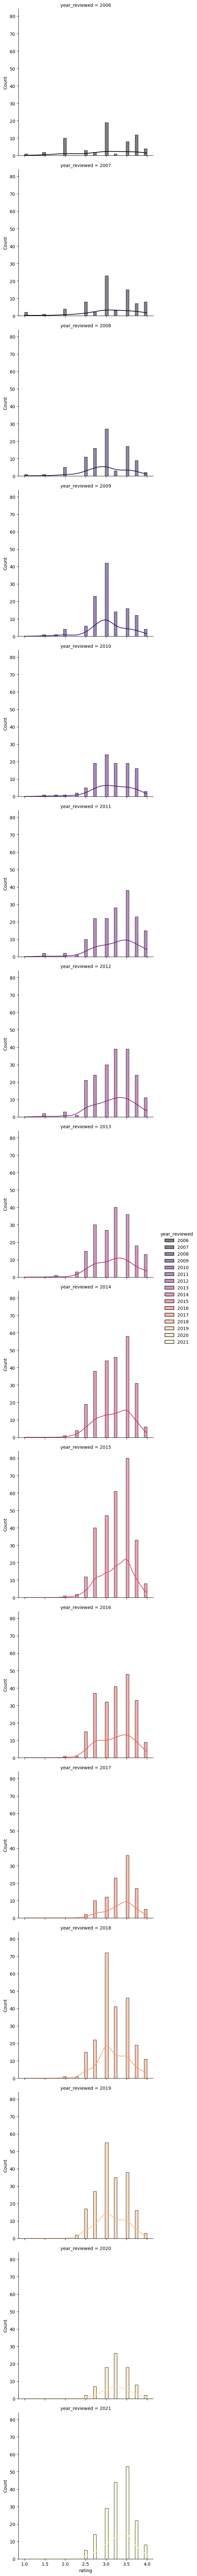

In [16]:
sns.displot(data=df, x="rating", row="year_reviewed", kde = True, hue= "year_reviewed",palette="magma")
plt.show()

In [17]:
data = df.loc[(df['year_reviewed'] == 2006) | (df['year_reviewed'] == 2021)]

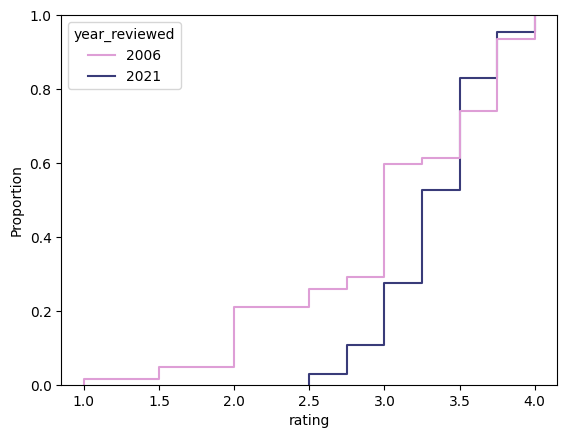

In [18]:
# Comparando rating do primeiro e último ano
data = df.loc[(df['year_reviewed'] == 2006) | (df['year_reviewed'] == 2021)]
sns.ecdfplot(data=data, x="rating", hue="year_reviewed",palette="tab20b_r");

#### 1. Quais países de origem do grão resultam na classificação mais alta?

In [19]:
total_bean_origin = df["bean_origin"].unique().size
print(f'Total de países de grão de origem: {total_bean_origin}')

Total de países de grão de origem: 62


In [20]:
df_bean = df.groupby("bean_origin").mean(numeric_only=True)
df_bean.head()

,year_reviewed,cocoa_percent,num_ingredients,rating
bean_origin,,,,
Australia,2014.000000,69.000000,3.666667,3.250000
Belize,2016.197368,72.855263,2.684211,3.233553
Blend,2011.160256,71.926282,3.602564,3.038462
Bolivia,2014.725000,71.587500,2.825000,3.181250
Brazil,2014.102564,71.384615,3.102564,3.262821


In [21]:
df_bean_sorted = df_bean.sort_values(by="rating",ascending=False)
df_bean_sorted.head()

,year_reviewed,cocoa_percent,num_ingredients,rating
bean_origin,,,,
Tobago,2012.500000,65.000000,3.500000,3.625000
China,2021.000000,72.000000,4.000000,3.500000
Sao Tome & Principe,2020.000000,72.500000,3.500000,3.500000
Solomon Islands,2017.400000,71.800000,2.900000,3.450000
Congo,2013.090909,70.454545,3.454545,3.318182


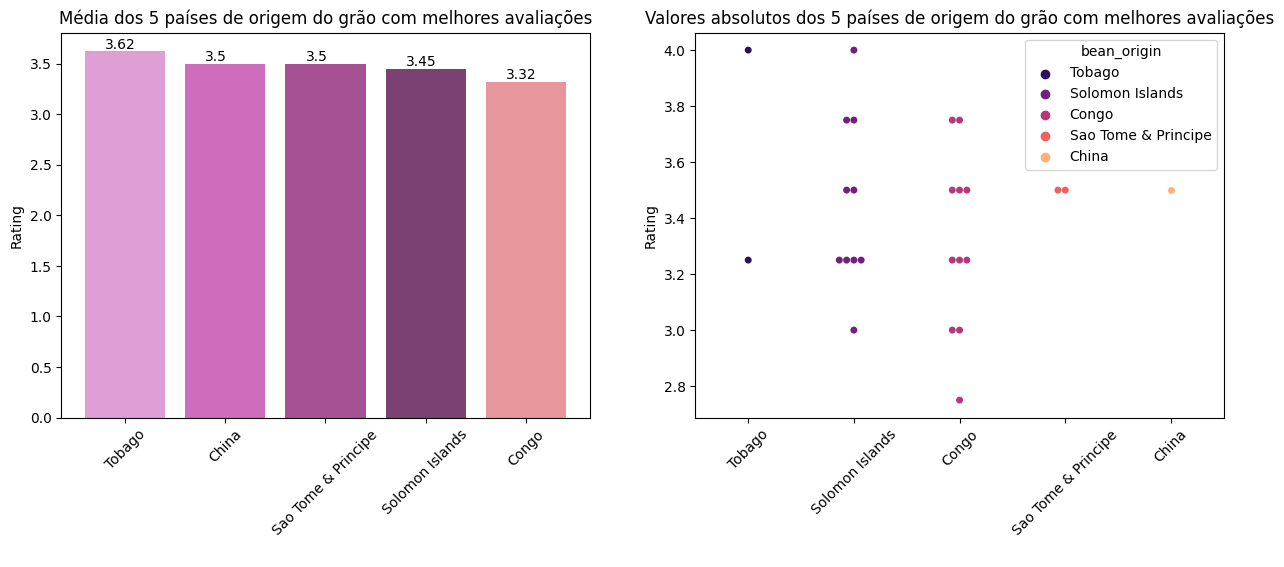

In [22]:
fig,axes = plt.subplots(nrows=1,ncols=2,figsize=(15,5))

#Bar chart 

#--------------------------------------------------------------------------------------REFATORAR !!!!!
j=0
altura = []
while j < 6:
    for i in df_bean_sorted["rating"]:
       altura.append(round(i,2))
    j += 1
    
posicao = []
for i in range(0,5,1): 
   posicao.append(i)
#--------------------------------------------------------------------------------------

#plot(x,y)
col_map = plt.get_cmap('tab20b_r')
axes[0].bar(df_bean_sorted.index[:5],df_bean_sorted["rating"][:5],color=col_map.colors)

#Definindo labels
axes[0].set(ylabel="Rating",
            title="Média dos 5 países de origem do grão com melhores avaliações")

axes[0].set_xticks(ticks = np.arange(5),labels = df_bean_sorted.index[:5],rotation = 45)

#Colocando a quantidade em cada barra -> x=posição, y=altura, s=altura
for i in range(5):
   axes[0].text(x=posicao[i]-0.2, y=altura[i]+0.03, s=str(altura[i]),   
           fontsize=10)

#Scatterplot
df_best_bean_origin = df.loc[((df["bean_origin"] == "Tobago")| 
                              (df["bean_origin"] == "China")|
                              (df["bean_origin"] == "Sao Tome & Principe")|
                              (df["bean_origin"] == "Solomon Islands")|
                              (df["bean_origin"] == "Congo"))]

df_best_bean_origin = df_best_bean_origin.sort_values(by="rating",ascending=False)

#plot(x,y)
sns.swarmplot(x="bean_origin", y="rating",hue="bean_origin", palette="magma", data=df_best_bean_origin, ax=axes[1]);

#Definindo labels
axes[1].set(xlabel = " ",
            ylabel="Rating",
            title="Valores absolutos dos 5 países de origem do grão com melhores avaliações")

axes[1].set_xticks(ticks = np.arange(5),labels = df_best_bean_origin["bean_origin"].unique(),rotation = 45)

plt.show()



Dos 62 países de origem do grão analisados, os 5 com melhores avaliações em termos absolutos são: Tobago, China, São Tomé & Príncipe, Ilhas Solomon e Congo. Entretanto, é pertinente notar que tais países apresentam poucas avaliações. Dessa forma, é importante investigar, em termos percentuais, quais países de origem do grão apresentam melhores avaliações ?

In [23]:
df_bean["%_bean_origin_participation"] = (round((df["bean_origin"].value_counts() / len(df["bean_origin"]))*100,2))

In [24]:
df_origin_bean_participation = df_bean.sort_values(by="%_bean_origin_participation",ascending=False)
df_origin_bean_participation.head()

,year_reviewed,cocoa_percent,num_ingredients,rating,%_bean_origin_participation
bean_origin,,,,,
Venezuela,2012.703557,72.017787,3.138340,3.231225,10.00
Peru,2015.262295,70.950820,2.930328,3.197746,9.64
Dominican Republic,2014.597345,71.526549,2.849558,3.215708,8.93
Ecuador,2012.707763,73.276256,3.068493,3.164384,8.66
Madagascar,2013.446328,71.237288,2.988701,3.266949,7.00


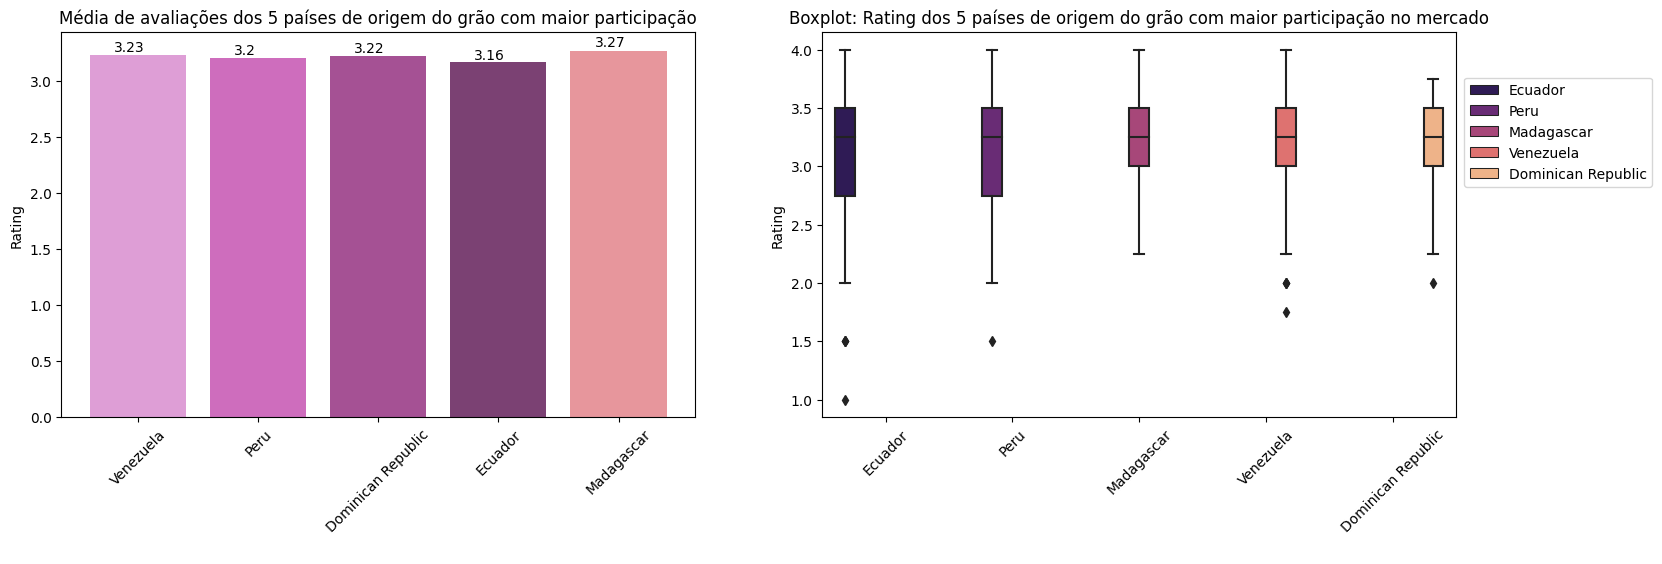

In [25]:
fig,axes = plt.subplots(nrows=1,ncols=2,figsize=(18,5))

#Bar chart 

#--------------------------------------------------------------------------------------REFATORAR !!!!!
j=0
altura = []
while j < 6:
    for i in df_origin_bean_participation["rating"]:
       altura.append(round(i,2))
    j += 1
    
posicao = []
for i in range(0,5,1): 
   posicao.append(i)
#--------------------------------------------------------------------------------------

#plot(x,y)
col_map = plt.get_cmap('tab20b_r')
axes[0].bar(df_origin_bean_participation.index[:5],df_origin_bean_participation["rating"][:5],color=col_map.colors)

#Definindo labels
axes[0].set(ylabel="Rating",
            title="Média de avaliações dos 5 países de origem do grão com maior participação")

axes[0].set_xticks(ticks = np.arange(5),labels = df_origin_bean_participation.index[:5],rotation = 45)

#Colocando a quantidade em cada barra -> x=posição, y=altura, s=altura
for i in range(5):
   axes[0].text(x=posicao[i]-0.2, y=altura[i]+0.03, s=str(altura[i]),   
           fontsize=10)

#Boxplot
df_bean_origin_top_participation = df.loc[((df["bean_origin"] == "Venezuela")| 
                              (df["bean_origin"] == "Peru")|
                              (df["bean_origin"] == "Dominican Republic")|
                              (df["bean_origin"] == "Ecuador")|
                              (df["bean_origin"] == "Madagascar"))]

df_bean_origin_top_participation = df_bean_origin_top_participation.sort_values(by="rating",ascending=False)

#plot(x,y)
sns.boxplot(x="bean_origin", y="rating",hue="bean_origin", palette="magma", data=df_bean_origin_top_participation,ax=axes[1]);

axes[1].set_xticks(ticks = np.arange(5),labels = df_bean_origin_top_participation["bean_origin"].unique(),rotation = 45)

#Definindo labels
axes[1].set(xlabel = " ",
            ylabel="Rating",
            title="Boxplot: Rating dos 5 países de origem do grão com maior participação no mercado")


axes[1].legend(bbox_to_anchor=(0.52, 0.8, 0.8, 0.1))

plt.show()



Quando analisa-se a participação de mercado, os 5 maiores produtores de grão de cacau possuem uma avaliação média de grãos dentro do recomendado. A Venezuela detém 10% da produção do grão e possue uma avaliação média de 3.23. Madagascar ocupa a 5° posição de maior produtor com 7% do mercado e tem um grão avaliado com 3.27.

#### 2. A porcentagem ou ingredientes de cacau afetam a classificação?

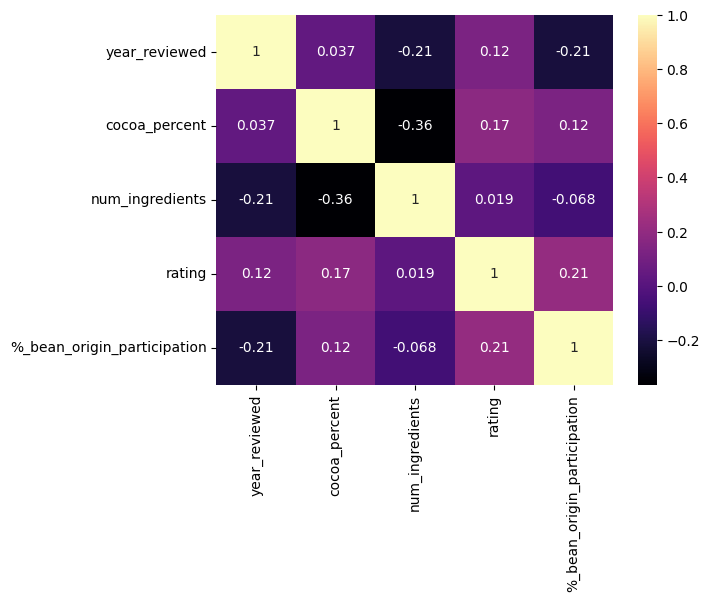

In [26]:
sns.heatmap(df_bean.corr(numeric_only=True), cmap='magma', annot=True)
plt.show()

Não evidências suficientes que provem que a porcentagem de cacau ou o número de ingredientes afetem a classificação, pois não há forte correlação, 0.17 e 0.019 respectivamente.

#### 3. Com classificações altas, quais são as características mais memoráveis?

In [27]:
df_high_rating = df[df["rating"] >= 3]
df_high_rating.head()

,manufacturer,company_location,year_reviewed,bean_origin,cocoa_percent,num_ingredients,ingredients,review,rating
0,5150,U.S.A.,2019,Tanzania,76.0,3.0,"B,S,C","rich cocoa, fatty, bready",3.25
1,5150,U.S.A.,2019,Dominican Republic,76.0,3.0,"B,S,C","cocoa, vegetal, savory",3.50
2,5150,U.S.A.,2019,Madagascar,76.0,3.0,"B,S,C","cocoa, blackberry, full body",3.75
3,5150,U.S.A.,2021,Fiji,68.0,3.0,"B,S,C","chewy, off, rubbery",3.00
4,5150,U.S.A.,2021,Venezuela,72.0,3.0,"B,S,C","fatty, earthy, moss, nutty,chalky",3.00


In [28]:
# Checando o rating máximo e mínimo
min_rating = df_high_rating['rating'].min()
max_rating = df_high_rating['rating'].max()

print(f'Mínimo rating: {min_rating} - Máximo rating: {max_rating}')

Mínimo rating: 3.0 - Máximo rating: 4.0


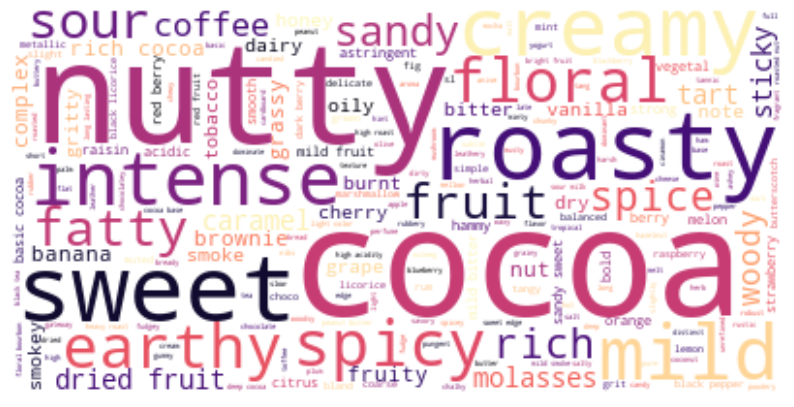

In [29]:
wordcloud2 = WordCloud(background_color="white",colormap = 'magma').generate(' '.join(df_high_rating['review']))
plt.figure(figsize = (10,12))
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")
plt.show()

#### 4. Determinar o fabricante com barras de chocolate altamente avaliadas

In [30]:
total_manufacturer = df["manufacturer"].unique().size
print(f'Total de fabricantes: {total_manufacturer}')

Total de fabricantes: 580


In [31]:
df_highly_recommend = df[df["rating"] >= 3.5]
min_rating2 = df_highly_recommend['rating'].min()
max_rating2 = df_highly_recommend['rating'].max()

print(f'minimo rating: {min_rating2} - maximo rating: {max_rating2}')

minimo rating: 3.5 - maximo rating: 4.0


In [32]:
df_manufacturer = df_highly_recommend.groupby("manufacturer").mean(numeric_only=True)
df_manufacturer_sorted = df_manufacturer.sort_values(by="rating",ascending=False)
df_manufacturer_sorted.head()

,year_reviewed,cocoa_percent,num_ingredients,rating
manufacturer,,,,
Tobago Estate (Pralus),2012.0,70.0,3.0,4.000
Taste Artisan,2019.0,75.0,3.0,4.000
Hotel Chocolat,2013.0,70.0,2.0,4.000
Ocelot,2015.0,72.5,3.0,3.875
Heirloom Cacao Preservation (Zokoko),2016.0,70.0,3.0,3.875


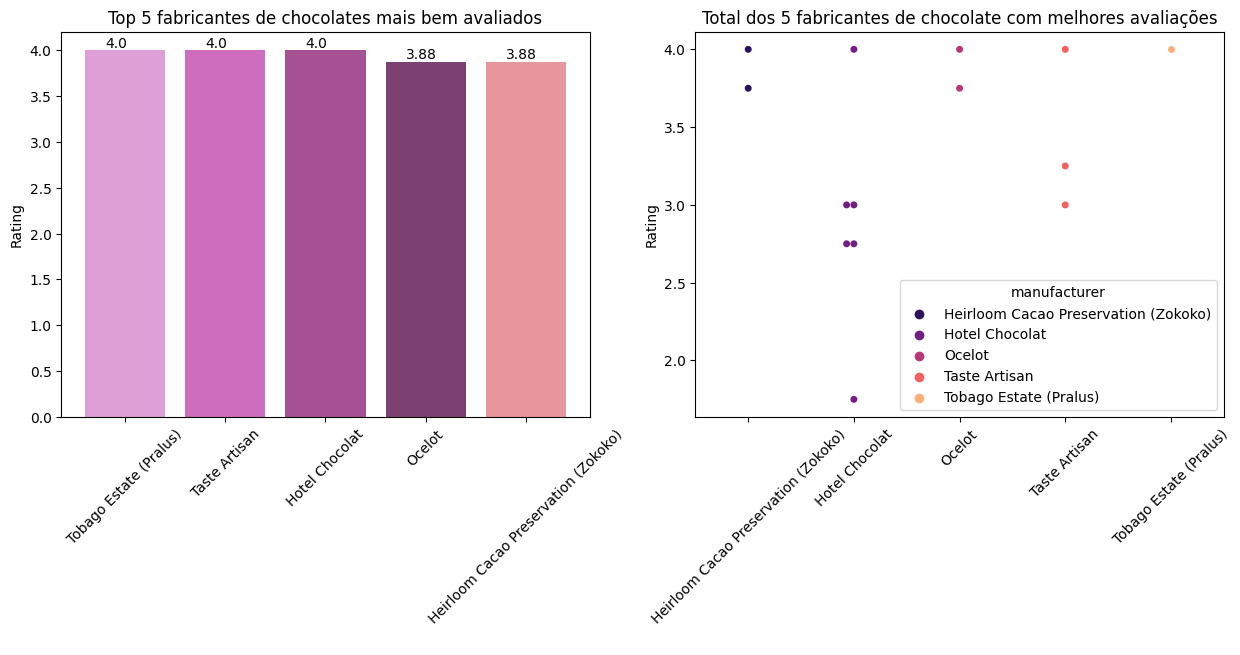

In [33]:
fig,axes = plt.subplots(nrows=1,ncols=2,figsize=(15,5))

#Bar Chart

#--------------------------------------------------------------------------------------REFATORAR !!!!!
j=0
altura2 = []
while j < 6:
    for i in df_manufacturer_sorted["rating"]:
       altura2.append(round(i,2))
    j += 1
    
posicao2 = []
for i in range(0,5,1): 
   posicao2.append(i)
#--------------------------------------------------------------------------------------

#plot(x,y)
col_map = plt.get_cmap('tab20b_r')
axes[0].bar(df_manufacturer_sorted.index[:5],df_manufacturer_sorted["rating"][:5], color=col_map.colors)

#Definindo labels
axes[0].set(ylabel="Rating",
            title="Top 5 fabricantes de chocolates mais bem avaliados")

axes[0].set_xticks(ticks = np.arange(5),labels = df_manufacturer_sorted.index[:5],rotation = 45)

#Colocando a quantidade em cada barra -> x=posição, y=altura, s=altura
for i in range(5):
   axes[0].text(x=posicao2[i]-0.2, y=altura2[i]+0.03, s=str(altura2[i]),   
           fontsize=10)

#Swarmplot

df_best_manufacturer = df.loc[((df["manufacturer"] == "Tobago Estate (Pralus)")| 
                              (df["manufacturer"] == "Taste Artisan")|
                              (df["manufacturer"] == "Hotel Chocolat")|
                              (df["manufacturer"] == "Ocelot")|
                              (df["manufacturer"] == "Heirloom Cacao Preservation (Zokoko)"))]

df_best_manufacturer = df_best_manufacturer.sort_values(by="rating",ascending=False)

#plot(x,y)
sns.swarmplot(x="manufacturer", y="rating",hue="manufacturer", palette="magma", data=df_best_manufacturer, ax=axes[1]);

#Definindo labels
axes[1].set(xlabel = " ",
            ylabel="Rating",
            title="Total dos 5 fabricantes de chocolate com melhores avaliações")

axes[1].set_xticks(ticks = np.arange(5),labels = df_best_manufacturer["manufacturer"].unique(),rotation = 45)


plt.show()

Dos 580 fabricantes de chocolates analisados, os 5 com melhores avaliações são: Tobago Estate(Pralus), Taste Artisan, Hotel Chocolat, Ocelot, Heirloom Cacao Perservation(Zokoko).Porém, é importante notar que tais produtores apresentam poucas avaliações. Dessa forma, é importante investigar, em termos percentuais, quais produtores apresentam melhores avaliações ?

In [34]:
df_manufacturer["%_manufacturer_participation"] = (round((df["manufacturer"].value_counts() / len(df["manufacturer"]))*100,2))

In [35]:
df_manufacturer_participation = df_manufacturer.sort_values(by="%_manufacturer_participation",ascending=False)
df_manufacturer_participation.head()

,year_reviewed,cocoa_percent,num_ingredients,rating,%_manufacturer_participation
manufacturer,,,,,
Soma,2013.666667,71.023810,3.000000,3.744048,2.21
Fresco,2015.000000,69.913043,2.869565,3.652174,1.54
Arete,2016.043478,70.391304,2.260870,3.684783,1.26
Bonnat,2011.450000,74.500000,3.000000,3.775000,1.19
A. Morin,2014.687500,68.250000,3.937500,3.703125,1.03


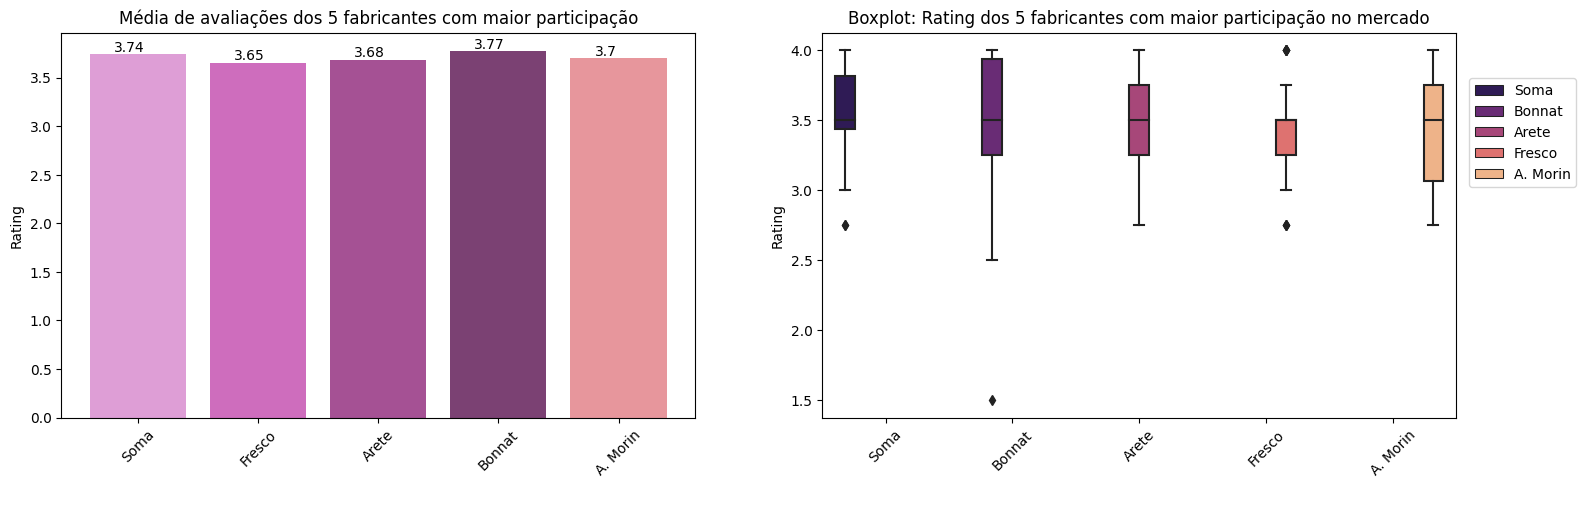

In [36]:
fig,axes = plt.subplots(nrows=1,ncols=2,figsize=(18,5))

#Bar chart 

#--------------------------------------------------------------------------------------REFATORAR !!!!!
j=0
altura = []
while j < 6:
    for i in df_manufacturer_participation["rating"]:
       altura.append(round(i,2))
    j += 1
    
posicao = []
for i in range(0,5,1): 
   posicao.append(i)
#--------------------------------------------------------------------------------------

#plot(x,y)
col_map = plt.get_cmap('tab20b_r')
axes[0].bar(df_manufacturer_participation.index[:5],df_manufacturer_participation["rating"][:5],color=col_map.colors)

#Definindo labels
axes[0].set(ylabel="Rating",
            title="Média de avaliações dos 5 fabricantes com maior participação")

axes[0].set_xticks(ticks = np.arange(5),labels = df_manufacturer_participation.index[:5],rotation = 45)

#Colocando a quantidade em cada barra -> x=posição, y=altura, s=altura
for i in range(5):
   axes[0].text(x=posicao[i]-0.2, y=altura[i]+0.03, s=str(altura[i]),   
           fontsize=10)

#Boxplot
df_manufacturer_top_participation = df.loc[((df["manufacturer"] == "Soma")| 
                              (df["manufacturer"] == "Fresco")|
                              (df["manufacturer"] == "Arete")|
                              (df["manufacturer"] == "Bonnat")|
                              (df["manufacturer"] == "A. Morin"))]

df_manufacturer_top_participation = df_manufacturer_top_participation.sort_values(by="rating",ascending=False)

#plot(x,y)
sns.boxplot(x="manufacturer", y="rating",hue="manufacturer", palette="magma", data=df_manufacturer_top_participation,ax=axes[1]);

axes[1].set_xticks(ticks = np.arange(5),labels = df_manufacturer_top_participation["manufacturer"].unique(),rotation = 45)

#Definindo labels
axes[1].set(xlabel = " ",
            ylabel="Rating",
            title="Boxplot: Rating dos 5 fabricantes com maior participação no mercado")


axes[1].legend(bbox_to_anchor=(0.4, 0.8, 0.8, 0.1))

plt.show()


Quando analisa-se a participação de mercado, os 5 fabricantes possuem uma avaliação média altamente recomendada. A Soma detém 2.2% da produção e possue uma avaliação média de 3.74. Bonnat ocupa a 4° posição de maior produtor com 1.19% do mercado e tem um grão avaliado com 3.77.

## Conclusão

1. Quais países de origem do grão resultam na classificação mais alta? **Na média de avaliações: Tobago, China, São Tomé & Príncipe, porém ao observar a participação percentual de produtores no mercado, os com classificação mais altas são: Madagascar, Venezuela e República Dominicana**

2. A porcentagem ou ingredientes de cacau afetam a classificação? **Não existe forte correlação entre eles**

3. Com classificações altas, quais são as características mais memoráveis? **Cacau, noz, intenso, cremoso**

4. Quais são os fabricantes com barras de chocolate altamente avaliadas ? **Na média de avaliações:Tobago Estate(Pralus), Taste Artisan, Hotel Chocolat, porém ao observar a participação percentual de fabricantes no mercado, os com classificação mais altas são: Bonnat, Soma e A. Morin**